*** Exemplo 1 ***
media 0.0007979280648584198
variancia 4.885215523290723e-07


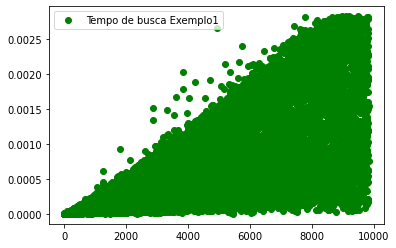

*** Exemplo 2 ***
media 0.0007773736686324527
variancia 4.633146852353697e-07


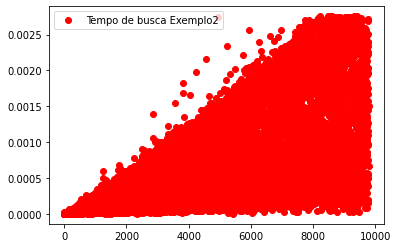

*** Exemplo 3 ***
media 0.00048680271859698177
variancia 1.8272702905316335e-07


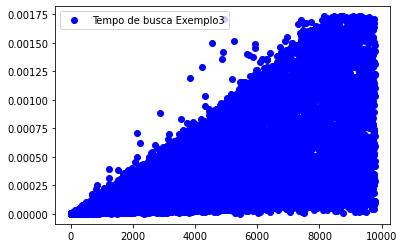

*** Proposta 1 ***
media 0.0003715357571441379
variancia 1.04228934279888e-07


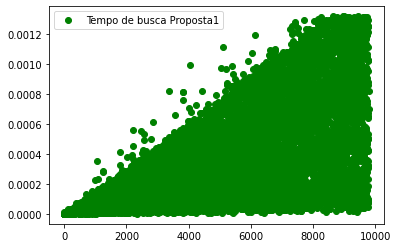

*** Proposta 2 ***
media 0.00039927360662925747
variancia 1.2187087756815478e-07


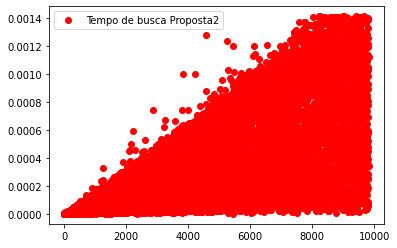

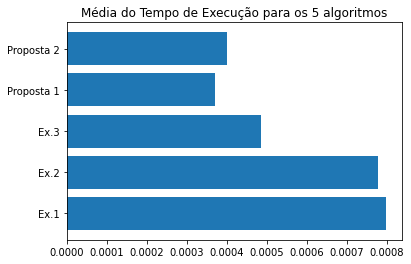

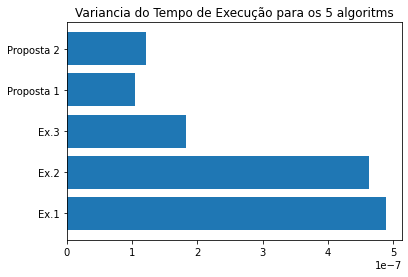

*** Sumário sobre a melhoria de performance ***
*** Lista com tamanho variado de 10 a 10000 ***
*** Valores em Percentual ***
Melhoria de performance Ex2 versus Ex1 (Perc.): 2
Melhoria de performance Ex3 versus Ex2 (Perc.): 37
Melhoria de performance Proposta 1 versus Ex3 (Perc.): 24
Melhoria de performance Proposta 2 versus Ex3 (Perc.): 18


In [31]:
#@title
# Daniela America da Silva
# Exemplos de implementação melhoria da busca Knuth e 2 novas propostas
# O tamanho da lista varia de 10 a 10000 elementos 

import pandas as pd
import numpy as np
import time, datetime
import matplotlib.pyplot as plt
import random
import statistics

try:
  from goto import with_goto
except:
  !pip install goto-statement
  from goto import with_goto



#Exemplo busca knuth1
def busca1():
  for i in range (0,n,1):
    times.append(time.time() - t0)
    if (x==v[i]):
       return i;
  return -1;

#Exemplo busca knuth2
@with_goto
def busca2():
  v[n]=x
  i = 0
  label .teste 
  if (x!=v[i]):
    i+=1
    times.append(time.time() - t0)
    goto .teste
  return i

#Exemplo busca knuth3
@with_goto
def busca3():
  v[n]=x
  i = 0
  goto .teste
  label .loop 
  i+=2
  label .teste
  if (x==v[i]):
    times.append(time.time() - t0)
    goto .found
  if (v[i+1]!=x):
    times.append(time.time() - t0)
    goto .loop
  label .found    
  return i

#Minha criacao divide a lista em duas partes
@with_goto
def busca4():
  v[n]=x
  i = 0
  j=round(n/2)
  goto .teste
  label .loop 
  i+=2
  j+=2
  label .teste
  if (x==v[i]):
    times.append(time.time() - t0)
    goto .found
  if (x==v[j]):
    times.append(time.time() - t0)
    i = j
    goto .found
  if (x==v[i+1]):
    times.append(time.time() - t0)
    goto .found  
  if (x==v[j+1]):
    times.append(time.time() - t0)
    i = j
    goto .found
  times.append(time.time() - t0)
  goto .loop
  label .found    
  return i


#Minha criacao compara a cada 3 elementos
@with_goto
def busca5():
  v[n]=x
  i = 0
  goto .teste
  label .loop 
  i+=3
  label .teste
  if (x==v[i]):
    times.append(time.time() - t0)
    goto .found
  if (v[i+1]==x):
    times.append(time.time() - t0)
    goto .found
  if (v[i+2]!=x):
    times.append(time.time() - t0)
    goto .loop
  label .found    
  return i

#Remove tempos de execução discrepantes
def removeoutlier(values):
    fator = 1.5
    q3, q1 = np.percentile(values, [75, 25])
    iqr = q3- q1
    lowpass = q1 - (iqr * fator)
    highpass = q3 + (iqr * fator)
    return [ro for ro in values if ro > lowpass and ro < highpass]


#inicializa contadores do tempo de execução
times=[]
size = 10000
e1 = [] + [0] * size
e2 = [] + [0] * size
e3 = [] + [0] * size
e4 = [] + [0] * size
e5 = [] + [0] * size

#Loop para testar performance com listas de tamanho 10 a 10010
for c in range(10,size+10,1):
  n=c
  v = random.sample(range(1,n+1), n)
  v.append(0)
  r = random.sample(range(1,n+1), 1)
  x = r[0]

  times=[]
  t0=time.time()
  pos = busca1()
  y0=times
  tb0 = time.time() - t0

  times=[]
  t0=time.time()
  pos = busca2()
  y1 = times
  tb1 = time.time() - t0

  times=[]
  t0=time.time()
  pos = busca3()
  y2 = times
  tb2 = time.time() - t0

  times=[]
  t0=time.time()
  pos = busca4()
  y3 = times
  tb3 = time.time() - t0

  times=[]
  t0=time.time()
  pos = busca5()
  y4 = times
  tb4 = time.time() - t0

  e1[c-10] = tb0
  e2[c-10] = tb1
  e3[c-10] = tb2
  e4[c-10] = tb3
  e5[c-10] = tb4


grupos = ['Ex.1', 'Ex.2', 'Ex.3', 'Proposta 1', 'Proposta 2']
valores_m = [] + [0] * 5
valores_v = [] + [0] * 5

print ('*** Exemplo 1 ***')
e1o = removeoutlier(e1)
valores_m[0] =  statistics.mean(e1o) 
valores_v[0] =  statistics.variance(e1o) 
print ('media', valores_m[0])
print ('variancia', valores_v[0])
plt.plot(e1o, 'go')
plt.legend(['Tempo de busca Exemplo1'], loc='best')
plt.show()

print ('*** Exemplo 2 ***')
e2o = removeoutlier(e2)  
valores_m[1] =  statistics.mean(e2o) 
valores_v[1] =  statistics.variance(e2o) 
print ('media', valores_m[1])
print ('variancia', valores_v[1])
plt.plot(e2o, 'ro')
plt.legend(['Tempo de busca Exemplo2'], loc='best')
plt.show()

print ('*** Exemplo 3 ***')
e3o = removeoutlier(e3)  
valores_m[2] =  statistics.mean(e3o) 
valores_v[2] =  statistics.variance(e3o) 
print ('media', valores_m[2])
print ('variancia', valores_v[2])
plt.plot(e3o, 'bo')
plt.legend(['Tempo de busca Exemplo3'], loc='best')
plt.show()

print ('*** Proposta 1 ***')
e4o = removeoutlier(e4)
valores_m[3] =  statistics.mean(e4o) 
valores_v[3] =  statistics.variance(e4o) 
print ('media', valores_m[3])
print ('variancia', valores_v[3])
plt.plot(e4o, 'go')
plt.legend(['Tempo de busca Proposta1'], loc='best')
plt.show()

print ('*** Proposta 2 ***')
e5o = removeoutlier(e5)
valores_m[4] =  statistics.mean(e5o) 
valores_v[4] =  statistics.variance(e5o) 
print ('media', valores_m[4])
print ('variancia', valores_v[4])
plt.plot(e5o, 'ro')
plt.legend(['Tempo de busca Proposta2'], loc='best')
plt.show()

plt.title("Média do Tempo de Execução para os 5 algoritmos")
plt.barh(grupos, valores_m)
plt.show()

plt.title("Variancia do Tempo de Execução para os 5 algoritms")
plt.barh(grupos, valores_v)
plt.show()

print ('*** Sumário sobre a melhoria de performance ***')
print ('*** Lista com tamanho variado de 10 a 10000 ***')
print ('*** Valores em Percentual ***')

print ('Melhoria de performance Ex2 versus Ex1 (Perc.):', round((1 - valores_m[0]-valores_m[1]/valores_m[0])*100))
print ('Melhoria de performance Ex3 versus Ex2 (Perc.):', round((1 - valores_m[1]-valores_m[2]/valores_m[1])*100))
print ('Melhoria de performance Proposta 1 versus Ex3 (Perc.):', round((1 - valores_m[2]-valores_m[3]/valores_m[2])*100))
print ('Melhoria de performance Proposta 2 versus Ex3 (Perc.):', round((1 - valores_m[2]-valores_m[4]/valores_m[2])*100))

